<a href="https://colab.research.google.com/github/ananya-dev147/My_Internship_Project/blob/main/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Model**

# **Machine learning with Python help in organize data, in machines and can also be taught to analyze and learn from disparate data sets - forming hypotheses, creating predictions, and improving decisions.**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# **Describe Data**

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **Data Visualization**

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.replace({'Geography': {'France': 2, 'Germany':1, 'Spain' : 0}}, inplace=True)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [ ]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [ ]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [ ]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [ ]:
df['Zero Balance'] = np. where (df['Balance']>0, 1, 0)

<Axes: >

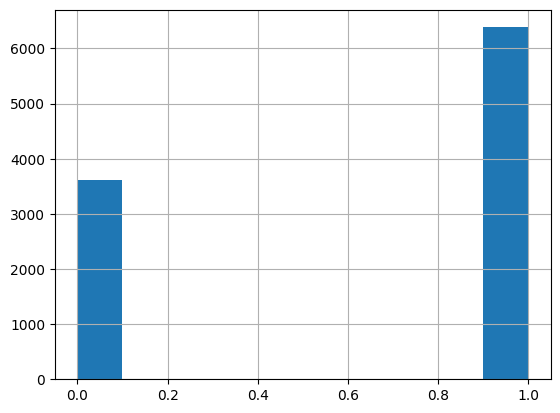

In [ ]:
df['Zero Balance'].hist()

# **Data Preprocessing**

In [ ]:
df.groupby (['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     France           4204     4204         4204    4204  4204    4204   
      Germany          1695     1695         1695    1695  1695    1695   
      Spain            2064     2064         2064    2064  2064    2064   
1     France            810      810          810     810   810     810   
      Germany           814      814          814     814   814     814   
      Spain             413      413          413     413   413     413   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     France        4204             4204             4204              4204   
      Germany       1695             1695             1695              1695   
      Spain         2064             2064             2064              2064   
1     France         810              810              810               810   
      Germany        814              814              814               814   
      Spain          413              413              413               413   

                 Estimated Salary  
Churn Geography                    
0     France                 4204  
      Germany                1695  
      Spain                  2064  
1     France                  810  
      Germany                 814  
      Spain                   413

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
X = df.drop(['Surname', 'Churn'], axis = 1)

In [ ]:
y = df['Churn']

In [ ]:
X.shape, y.shape

((10000, 11), (10000,))

# **Handling Imbalance Data**

Class Imbalance is a common problem in machine learning, especially in classification problems as machine learning algorithms are designed to maximize accuracy and reduce errors. If the data set is imbalance then in such cases, just by predicting the majority class we get a pretty high accuracy, but fails to capture the minority class, which is most often the point of creating the model in the first place. like in

1. **Fraud detection**
2. **Spam filtering**
3. **Disease screening**
4. **Online sales churn**
5. **Advertising click-throughs**

# **Undersampling** can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

# Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

# In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

# A drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

# **Oversampling** can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.

# The simplest implementation of over-sampling is to duplicate random records from the minorit class, which can cause overfiting.


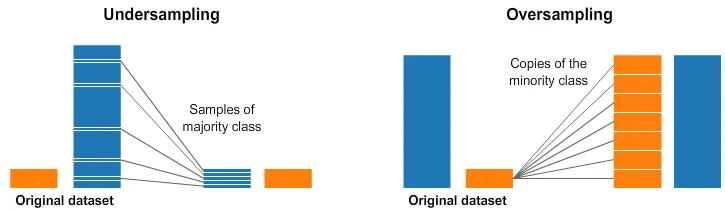

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


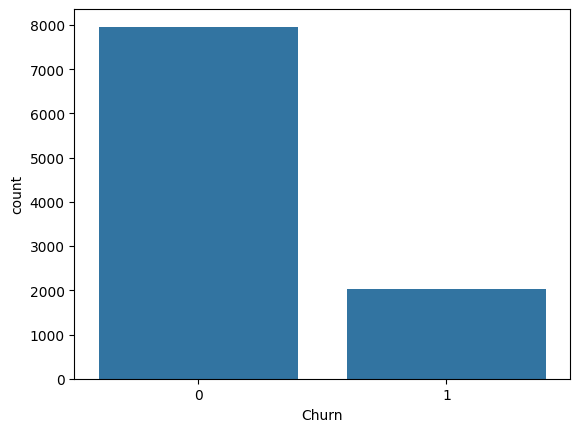

In [ ]:
sns.countplot(x = 'Churn', data = df);

In [ ]:
X.shape, y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler (random_state=2529)

In [ ]:
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

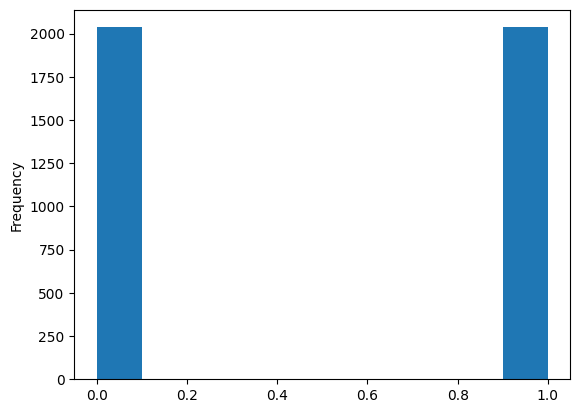

In [ ]:
y_rus.plot(kind = 'hist')

# **Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler (random_state=2529)

In [ ]:
X_ros, y_ros = ros.fit_resample(X, y)

In [ ]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

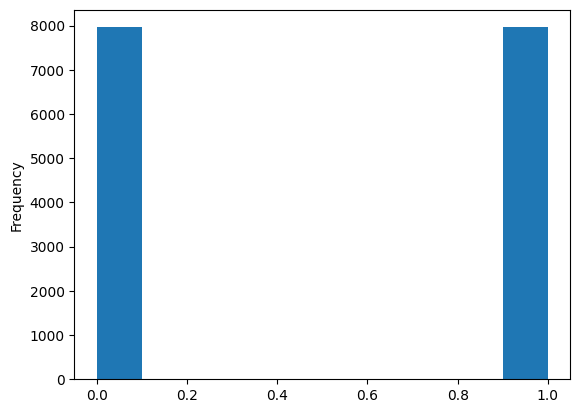

In [ ]:
y_ros.plot(kind = 'hist')

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# **Split Original Data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

# **Split Random Under Table Data**

In [ ]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)

# **Split Random Over Table Data**

In [ ]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529)

# **Standardized Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

# **Standardize Original Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

data = {'CreditScore': [650, 700, 750],
        'Age': [30, 40, 50],
        'Tenure': [2, 5, 8],
        'Balance': [10000, 50000, 100000],
        'Estimated Salary': [50000, 75000, 100000]}

x_train = pd.DataFrame(data)

sc = StandardScaler()

x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = {'CreditScore': [650, 700, 750, 600, 800],
        'Age': [30, 40, 50, 25, 60],
        'Tenure': [2, 5, 8, 1, 10],
        'Balance': [10000, 50000, 100000, 5000, 150000],
        'Estimated Salary': [50000, 75000, 100000, 40000, 120000]}

df = pd.DataFrame(data)

x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

sc = StandardScaler()

x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# **Standardize the Random Undersampled Data**

In [ ]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# **Standardize the Random Oversampled Data**

In [ ]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# **Support Vector Machine Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
print(x_train.shape)
print(y_train.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

svc.fit(x_train,y_train)

(7500, 11)
(7500,)


SVC()

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1991,    0],
       [ 509,    0]])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1991
           1       0.00      0.00      0.00       509

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)

In [ ]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
confusion_matrix(y_test, grid_predictions)

array([[1991,    0],
       [ 509,    0]])

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1991
           1       0.00      0.00      0.00       509

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model With Random Under Sampling**

In [ ]:
svc_rus = SVC()

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(x_train_rus[['Geography', 'Gender']]).toarray()

#Optionally, you can convert the array back to a DataFrame
features = pd.DataFrame(feature_array)
x_train_rus = x_train_rus.drop(['Geography', 'Gender'], axis=1)
x_train_rus = pd.concat([x_train_rus, features], axis=1)


svc_rus.fit(x_train_rus,y_train_rus)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
svc_rus.fit(x_train_rus,y_train_rus)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# **Model Accuracy**

In [ ]:
confusion_matrix(y_test_rus, y_pred_rus)

NameError: name 'y_pred_rus' is not defined

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

# **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)

In [ ]:
grid_rus.fit(x_train,y_train)

In [ ]:
print(grid_rus.best_estimator_)

In [ ]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus, grid_predictions_rus)

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

# **Model With Random Over Sampling**

In [ ]:
svc_ros = SVC()

In [ ]:
svc_ros.fit(x_train_ros,y_train_ros)

In [ ]:
y_pred_ros = svc_ros.predict(x_test_ros)

# **Model Accuracy**

In [ ]:
confusion_matrix(y_test_ros, y_pred_ros)

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

# **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [ ]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True, verbose=2, cv=2)

In [ ]:
grid_ros.fit(x_train_ros,y_train_ros)

In [ ]:
print(grid_ros.best_estimator_)

In [ ]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [ ]:
confusion_matrix(y_test_ros, grid_predictions_ros)

In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

# **Model Evaluation**

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

# **Prediction**

In [ ]:
confusion_matrix(y_test_ros, y_pred_ros)

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_ros,y_pred_ros)

# **Explanation**

## In this project we have used SVM(Support Vector Machine) to classify the bank customers into the customers who are likely to leave the bank(close their account) using the dataset available corresponding to it. We have analysed the data and have performed required data encoding, performed proper data preprocessing and also have handled the data imbalance for the corresponding class by using the techniques like Random Under Sampling and Random Over Sampling. We also compared the accuracy of the SVM model by using actual data, random oversampled data and random undersampled data which came to be similar. Finally we perfomed hyperparameter tuning for improving the model and then performed the same for all the three cases of dataset and found by analysing the results that the accuracy of SVM model after hyperparameter tuning which was trained using random oversampled data was maximum. Hence, we concluded that the model trained with random oversampled data and after hyperparameter tuning is most accurate and practical to be used for the task.